The Standardscalar is very sensitive to the present of Outliers in your data, even after standardizing your data and it stills contains Outliers, the best way is to use `Robust scaler` to scale your data to be more centered around the `median`.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import math

# Import Robust scaler Library from scikit-learn as an estimator object or as a function
from sklearn.preprocessing import scale
from sklearn.preprocessing import RobustScaler, robust_scale

### Diabetes dataset

In [4]:
# Import dataset
df = pd.read_csv('datasets/diabetes.csv')

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Examine 3 specific columns of the dataset

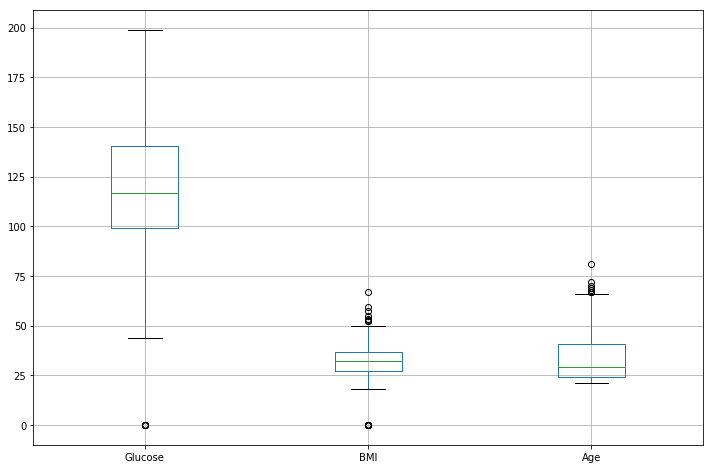

In [7]:
# Using Boxplot
df.boxplot(column=['Glucose', 'BMI', 'Age'], 
                  figsize=(12, 8))

plt.show()

# This contains a number of outliers as seen in the plot below

In [8]:
# Drop the Categorical Feature
outcome = df['Outcome']

df = df.drop(['Outcome'], axis = 1)

#### Standard scaling
We will compare the standard scaling of these features with the robust scaling

In [12]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [13]:
scaled_df = pd.DataFrame(scale(df), columns=df.columns)

In [14]:
scaled_df[['Glucose', 'BMI', 'Age']].describe()

,Glucose,BMI,Age
count,7.680000e+02,7.680000e+02,7.680000e+02
mean,3.614007e-18,2.295979e-16,1.857600e-16
std,1.000652e+00,1.000652e+00,1.000652e+00
min,-3.783654e+00,-4.060474e+00,-1.041549e+00
25%,-6.852363e-01,-5.955785e-01,-7.862862e-01
50%,-1.218877e-01,9.419788e-04,-3.608474e-01
75%,6.057709e-01,5.847705e-01,6.602056e-01
max,2.444478e+00,4.455807e+00,4.063716e+00


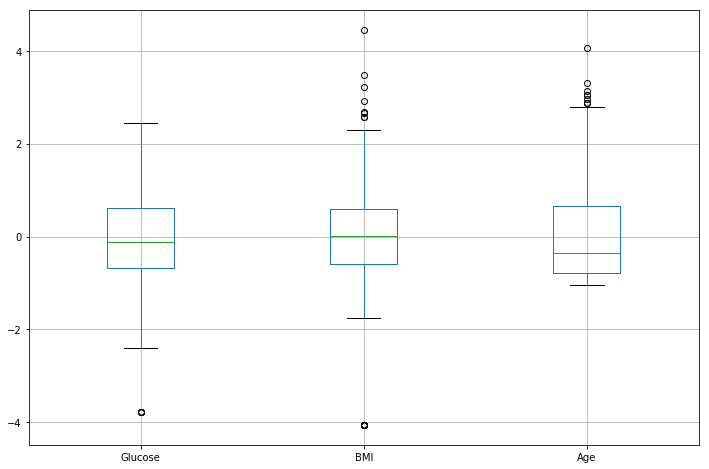

In [15]:
scaled_df.boxplot(column=['Glucose', 'BMI', 'Age'], 
                  figsize=(12, 8))

plt.show()

### Robust scaling
The values are scaled to be more robust to outliers. For this dataset, the values are similar to standard scaling, but in datasets with outliers which deviate even more from the mean, the results will be more apparent 

In [17]:
# Using the robust scaler function
robust_scaled_df = pd.DataFrame(robust_scale(df), 
                                columns=df.columns)

#### Smaller range of values
Consider the Age column. Standard scaling produces a range [-1, 4] while robust scaling puts the values in a range [-0.5, 3.1]

In [18]:
robust_scaled_df[['Glucose', 'BMI', 'Age']].describe()

,Glucose,BMI,Age
count,768.000000,768.000000,768.000000
mean,0.094413,-0.000798,0.249464
std,0.775094,0.847759,0.691778
min,-2.836364,-3.440860,-0.470588
25%,-0.436364,-0.505376,-0.294118
50%,0.000000,0.000000,0.000000
75%,0.563636,0.494624,0.705882
max,1.987879,3.774194,3.058824


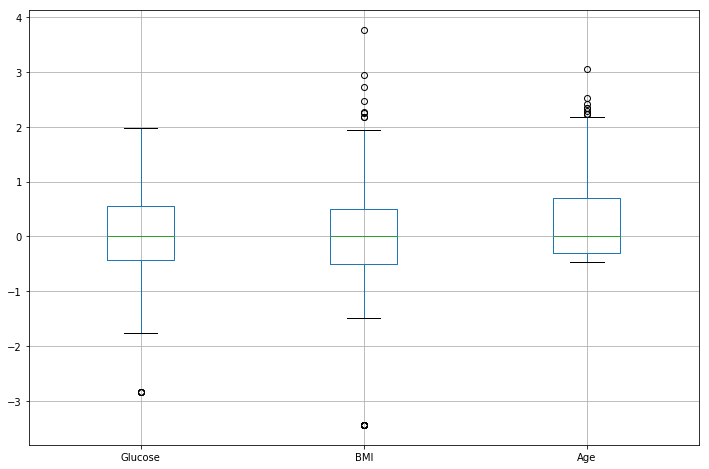

In [19]:
robust_scaled_df.boxplot(column=['Glucose', 'BMI', 'Age'], 
                         figsize=(12, 8))

plt.show()

#### The RobustScaler class

In [20]:
# Using the RobustScaler Estimator
robust_scaler = RobustScaler(copy=True, 
                             with_centering=True, 
                             with_scaling=True)

robust_scaler

RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)

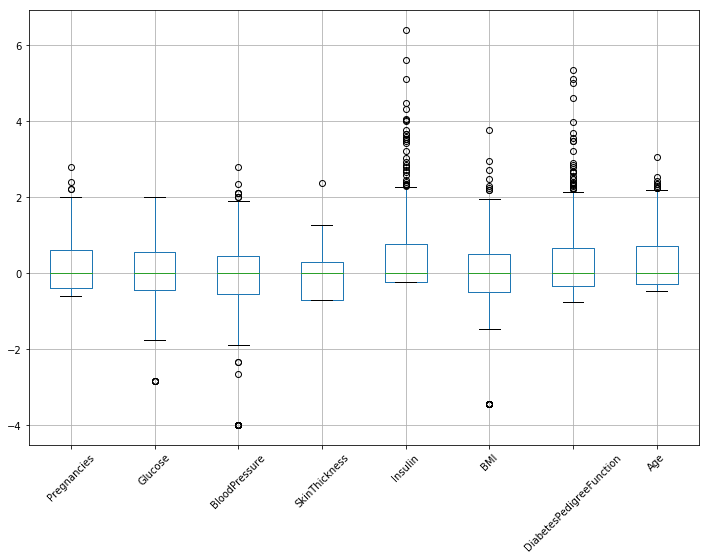

In [21]:
robust_scaled_array = robust_scaler.fit_transform(df)

robust_scaled_df = pd.DataFrame(robust_scaled_array,  
                                columns=df.columns)

robust_scaled_df.boxplot(figsize=(12, 8), rot = 45)

plt.show()